In [5]:
import pandas as pd
import requests
import datetime
import time

In [3]:
resp = requests.get('https://services.arcgis.com/njFNhDsUCentVYJW/arcgis/rest/services/MASTER_CaseTracker_2/FeatureServer/0/query?f=json&where=1%3D1&returnGeometry=false&spatialRel=esriSpatialRelIntersects&outFields=*&orderByFields=ReportDate%20asc&resultOffset=0&resultRecordCount=32000&resultType=standard&cacheHint=true')

if not resp.ok:
    raise RuntimeError("Could not get data from arcgis: {}".format(resp.text))
    
    
data = resp.json()

In [23]:
hospital_beds = [
    {
     'reportDate' : datetime.datetime.utcfromtimestamp(x['attributes']['ReportDate'] / 1000.0),
     'bedsICU':   int(x['attributes']['bedsICU']),
     'bedsAcute': int(x['attributes']['bedsAcute']),
     'bedsTotal': int(x['attributes']['bedsTotal'])
    }
    
    for x in data['features']
        if 'ReportDate' in x['attributes'] and x['attributes']['bedsTotal'] is not None
]

hospital_beds

[{'reportDate': datetime.datetime(2020, 3, 26, 0, 0),
  'bedsICU': 40,
  'bedsAcute': 68,
  'bedsTotal': 108},
 {'reportDate': datetime.datetime(2020, 3, 27, 0, 0),
  'bedsICU': 70,
  'bedsAcute': 76,
  'bedsTotal': 146},
 {'reportDate': datetime.datetime(2020, 3, 28, 0, 0),
  'bedsICU': 72,
  'bedsAcute': 113,
  'bedsTotal': 185},
 {'reportDate': datetime.datetime(2020, 3, 29, 0, 0),
  'bedsICU': 94,
  'bedsAcute': 118,
  'bedsTotal': 212},
 {'reportDate': datetime.datetime(2020, 3, 30, 0, 0),
  'bedsICU': 110,
  'bedsAcute': 150,
  'bedsTotal': 260},
 {'reportDate': datetime.datetime(2020, 3, 31, 0, 0),
  'bedsICU': 131,
  'bedsAcute': 177,
  'bedsTotal': 308},
 {'reportDate': datetime.datetime(2020, 4, 1, 0, 0),
  'bedsICU': 145,
  'bedsAcute': 257,
  'bedsTotal': 402},
 {'reportDate': datetime.datetime(2020, 4, 3, 0, 0),
  'bedsICU': 184,
  'bedsAcute': 263,
  'bedsTotal': 447},
 {'reportDate': datetime.datetime(2020, 4, 4, 0, 0),
  'bedsICU': 236,
  'bedsAcute': 369,
  'bedsTotal'

In [24]:
df = pd.DataFrame(sorted(hospital_beds,key=lambda x: x['reportDate']),
                  index=(x['reportDate'] for x in hospital_beds)
                 )
df

,reportDate,bedsICU,bedsAcute,bedsTotal
2020-03-26,2020-03-26,40,68,108
2020-03-27,2020-03-27,70,76,146
2020-03-28,2020-03-28,72,113,185
2020-03-29,2020-03-29,94,118,212
2020-03-30,2020-03-30,110,150,260
2020-03-31,2020-03-31,131,177,308
2020-04-01,2020-04-01,145,257,402
2020-04-03,2020-04-03,184,263,447
2020-04-04,2020-04-04,236,369,605
2020-04-05,2020-04-05,254,305,559


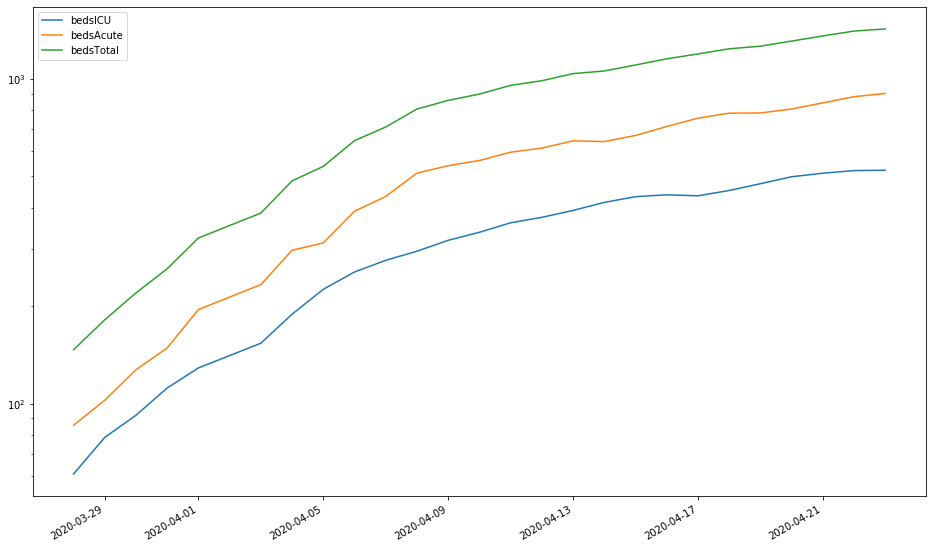

In [32]:
df[['bedsICU','bedsAcute','bedsTotal']].rolling(window=3).mean().plot(logy=True,figsize=(16,10))